In [36]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import cv2

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [37]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

In [38]:
data_dir 

'.\\datasets\\flower_photos'

In [39]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir 

WindowsPath('datasets/flower_photos')

In [40]:
list(data_dir.glob('*/*.jpg'))



[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [41]:
roses= list(data_dir.glob('*/*.jpg'))
roses[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

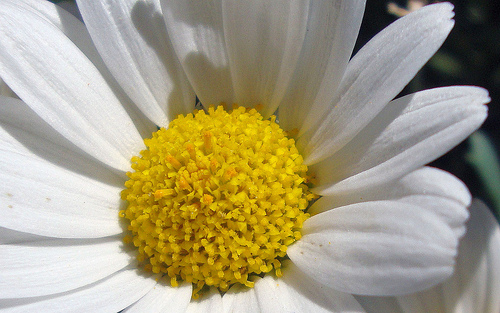

In [42]:
from PIL import Image
Image.open(str(roses[1]))


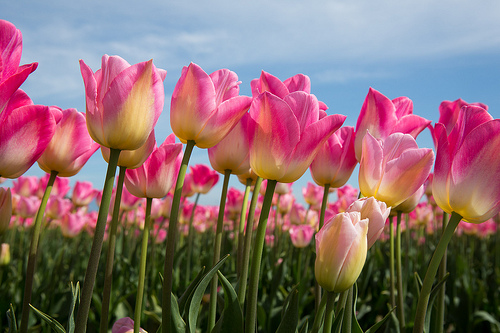

In [43]:
from PIL import Image
tulips = list (data_dir.glob('tulips/*'))
Image.open(str(tulips[3]))

In [44]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [45]:
# Dictionary of labels
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [46]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [47]:

img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [48]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [49]:
x, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        if img is not None:
            resized_img = cv2.resize(img, (180, 180))
            x.append(resized_img)
            y.append(flowers_labels_dict[flower_name])

In [50]:
x = np.array(x)
y = np.array(y)


In [51]:
from sklearn.model_selection import train_test_split 
#x_train, x_test, x_train, y_test, = train_test_split(x,y, random_state=0) 

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [52]:
len(X_train)

2752

In [53]:
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

In [54]:
num_classes = 5
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train model
model.fit(x_train_scaled, y_train, epochs=10)

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 37s 298ms/step - accuracy: 0.3628 - loss: 1.4966
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 335ms/step - accuracy: 0.5591 - loss: 1.0759
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 332ms/step - accuracy: 0.6581 - loss: 0.8682
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 310ms/step - accuracy: 0.7440 - loss: 0.6967
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 23s 271ms/step - accuracy: 0.8104 - loss: 0.5146
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 44s 294ms/step - accuracy: 0.9117 - loss: 0.2771
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 283ms/step - accuracy: 0.9573 - loss: 0.1477
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 332ms/step - accuracy: 0.9744 - loss: 0.0900
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 310ms/step - accuracy: 0.9900 - loss: 0.0397
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 310ms/step - accuracy: 0.9926 - loss: 0.0329


In [55]:
model.evaluate(x_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.6042 - loss: 1.7863


[1.808005928993225, 0.5936819314956665]

In [56]:
predictions = model.predict(x_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step


array([[  4.473761  ,  13.484587  ,   1.527494  , -11.729698  ,
          1.9710915 ],
       [  9.765644  ,   1.5408345 ,  -7.209102  ,  -9.939202  ,
          1.1472535 ],
       [  1.9323668 ,   1.7827951 ,  10.247071  , -10.860251  ,
          0.3181418 ],
       ...,
       [  1.1811903 ,  -2.3388567 ,  -6.400403  ,   5.0594645 ,
         -0.38743374],
       [  6.2355704 ,  -2.485356  ,   4.031421  ,  -4.534123  ,
          0.2688066 ],
       [  2.0326083 , -10.734677  ,   2.2724755 ,   3.0208669 ,
          3.4867778 ]], dtype=float32)

In [57]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.22064055e-04, 9.99861479e-01, 6.41269526e-06, 1.12076641e-11,
       9.99291842e-06], dtype=float32)>

In [58]:
np.argmax(score)

1

In [63]:
from tensorflow.keras import layers
from tensorflow import keras

data_augmentation = keras.Sequential([
    layers.RandomZoom(0.3),  # or layers.RandomZoom(height_factor=0.2, width_factor=0.2)
])


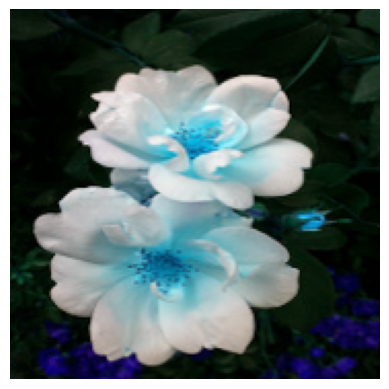

In [64]:
plt.axis('off')
plt.imshow(x[0])

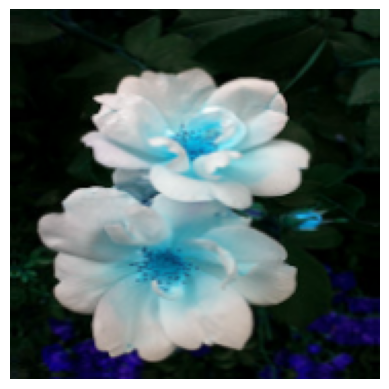

In [65]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

In [67]:
num_classes = 5
model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train model
model.fit(x_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 50s 430ms/step - accuracy: 0.3406 - loss: 1.5195
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 390ms/step - accuracy: 0.5577 - loss: 1.1044
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 38s 339ms/step - accuracy: 0.6196 - loss: 0.9656
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 300ms/step - accuracy: 0.6714 - loss: 0.8530
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 319ms/step - accuracy: 0.7006 - loss: 0.7872
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 31s 356ms/step - accuracy: 0.7515 - loss: 0.6775
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 43s 376ms/step - accuracy: 0.7416 - loss: 0.6728
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 37s 327ms/step - accuracy: 0.7925 - loss: 0.5623
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 30s 353ms/step - accuracy: 0.8021 - loss: 0.5238
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 32s 369ms/step - accuracy: 0.8146 - loss: 0.4942


In [68]:
model.evaluate(x_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.6967 - loss: 0.7890


[0.8196578621864319, 0.6971677541732788]